In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

%matplotlib inline

In [56]:
data_path = r"data\DigitalExposome Dataset.csv"
df = pd.read_csv(data_path)

In [57]:
df.columns

Index(['IBI', 'HR', 'NO2', 'Noise', 'NH3', 'PM10', 'CO', 'PM25', 'Label',
       'PM1', 'EDA', 'BVP'],
      dtype='object')

In [58]:
df.head()

,IBI,HR,NO2,Noise,NH3,PM10,CO,PM25,Label,PM1,EDA,BVP
0,0.0,0.377574,0.0,0.511358,0.003018,0.003091,0.871758,0.000000,5,0.000000,0.0,0.0
1,0.0,0.196398,0.0,0.490903,0.003018,0.003091,0.876848,0.003091,5,0.001854,0.0,0.0
2,0.0,0.454163,0.0,0.470449,0.006036,0.006181,0.881939,0.006181,5,0.003709,0.0,0.0
3,0.0,0.322451,0.0,0.449995,0.009055,0.009272,0.887030,0.009272,5,0.005563,0.0,0.0
4,0.0,0.237595,0.0,0.429540,0.012073,0.012362,0.892121,0.012362,5,0.007417,0.0,0.0


In [59]:
df.shape

(42436, 12)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42436 entries, 0 to 42435
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IBI     42436 non-null  float64
 1   HR      42436 non-null  float64
 2   NO2     42436 non-null  float64
 3   Noise   42436 non-null  float64
 4   NH3     42436 non-null  float64
 5   PM10    42436 non-null  float64
 6   CO      42436 non-null  float64
 7   PM25    42436 non-null  float64
 8   Label   42436 non-null  int64  
 9   PM1     42436 non-null  float64
 10  EDA     42436 non-null  float64
 11  BVP     42436 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 3.9 MB


In [61]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
IBI,42436.0,0.178688,0.230127,0.0,0.000000,0.016760,0.309984,1.0
HR,42436.0,0.530687,0.266531,0.0,0.309505,0.491213,0.776388,1.0
NO2,42436.0,0.502239,0.274914,0.0,0.285412,0.489703,0.736983,1.0
Noise,42436.0,0.427541,0.247601,0.0,0.214008,0.403671,0.618592,1.0
NH3,42436.0,0.564276,0.294515,0.0,0.305285,0.644756,0.826943,1.0
PM10,42436.0,0.208474,0.210981,0.0,0.017624,0.158454,0.326889,1.0
CO,42436.0,0.679874,0.308111,0.0,0.458047,0.805352,0.909832,5.0
PM25,42436.0,0.224901,0.223242,0.0,0.012362,0.176150,0.376813,1.0
Label,42436.0,3.326185,1.599863,1.0,2.000000,4.000000,5.000000,5.0
PM1,42436.0,0.230773,0.255253,0.0,0.006310,0.176316,0.407268,24.0


In [62]:
missing = df.isna().sum()
missing[missing > 0].sort_values(ascending=False)

Series([], dtype: int64)

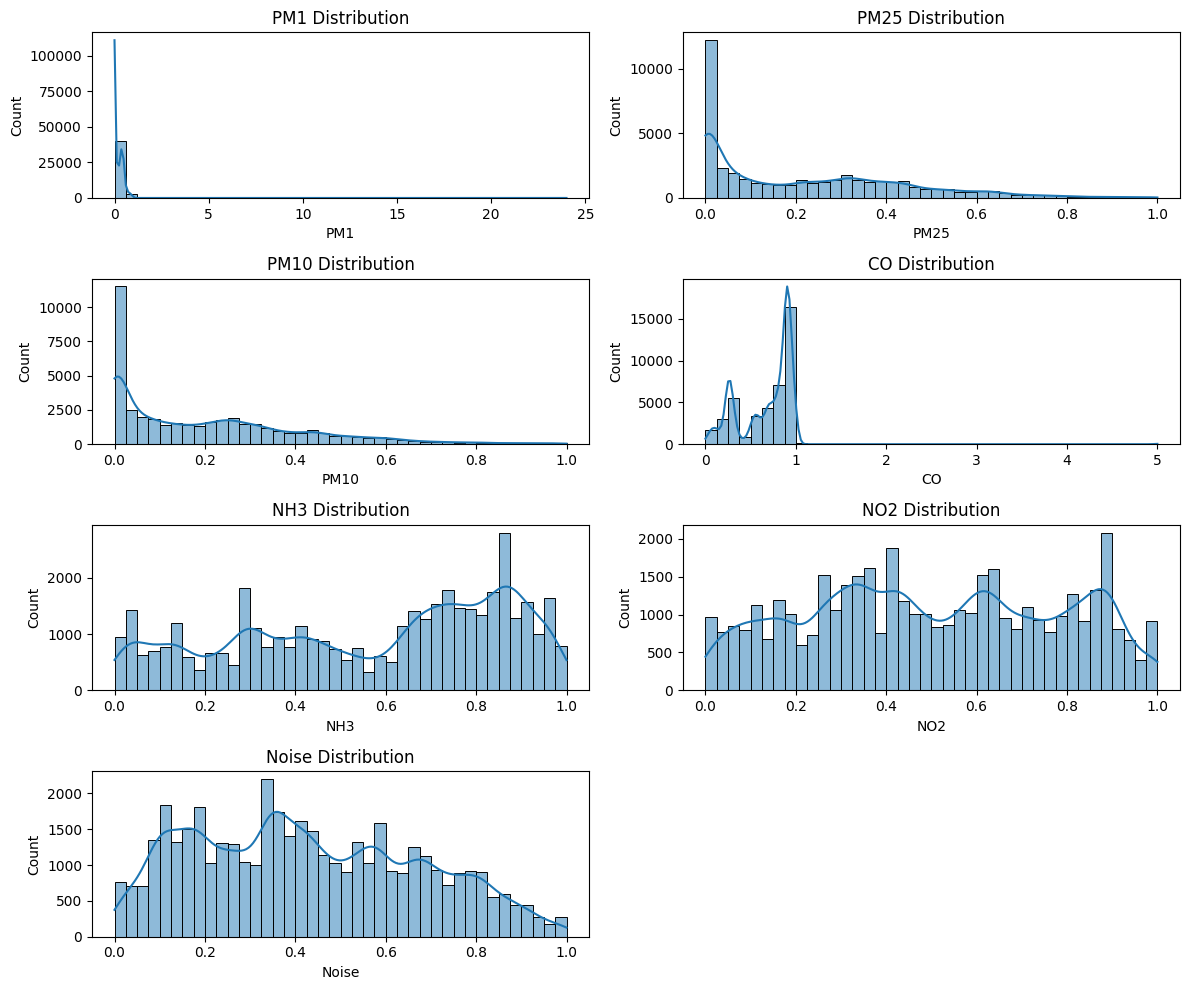

In [ ]:
env_cols = ["PM1", "PM25", "PM10", "CO", "NH3", "NO2", "Noise"]

plt.figure(figsize=(10, 8))
for i, col in enumerate(env_cols, 1):
    plt.subplot(4, 2, i)
    sns.histplot(df[col], kde=True, bins=40)
    plt.title(f"{col} Distribution")
plt.tight_layout()
plt.show()

In [64]:
(df["PM1"] > 1.0).sum(), (df["PM1"] > 5.0).sum()

(np.int64(1), np.int64(1))

In [65]:
sample = df.sample(5000, random_state=0)
fig = px.density_heatmap(sample,
                         x="PM25",
                         y="PM10",
                         nbinsx=40,
                         nbinsy=40,
                         title="Hexbin: PM25 vs. PM10 (normalized)",
                         width=800,
                         height=600
)
fig.show()

In [66]:
def noise_category(x):
    if x < 0.3: 
        return "Low"
    elif x < 0.6:
        return "Medium"
    else:
        return "High"

df["Noise_cat"] = df["Noise"].apply(noise_category)
fig = px.box(
    df, 
    x="Noise_cat", 
    y="EDA", 
    title="EDA by Noise Category",
    width=800,
    height=600
)
fig.show()


In [67]:
corr = df[["PM1","PM25","PM10","CO","NH3","NO2","Noise","HR","EDA","BVP","IBI"]].corr()
fig = px.imshow(
    corr, 
    text_auto=".2f", 
    title="Correlation Matrix (All Env + Physio Variables)",
    width=800,
    height=600
)
fig.show()

In [68]:
spikes = df[df["PM1"] > 5.0]
fig = go.Figure()
fig.add_trace(go.Scatter(x=spikes.index, y=spikes["PM1"], mode="markers", name="PM1"))
fig.add_trace(go.Scatter(x=spikes.index, y=spikes["HR"], mode="lines", name="HR (closeup)"))
fig.update_layout(
    title="PM1 Spikes & HR Overlaps",
    xaxis_title="Time",
    yaxis_title="Values",
    width=800,
    height=600
)
fig.show()


In [69]:
df["PM25_bin"] = pd.qcut(df["PM25"], q=4, labels=False)
fig = px.box(
    df, 
    x="PM25_bin", 
    y="EDA", 
    title="EDA by PM2.5 Quartile",
    width=800,
    height=600
)
fig.show()


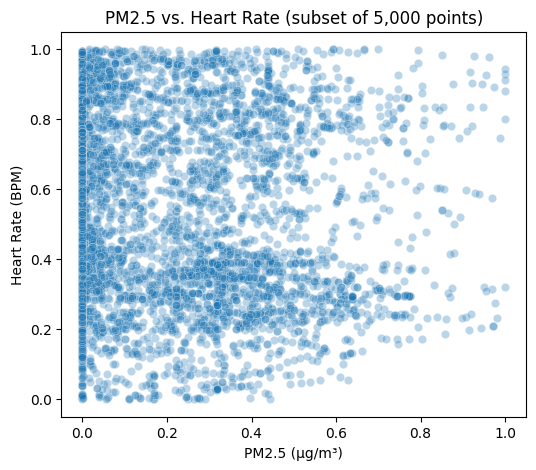

In [70]:
plt.figure(figsize=(6, 5))
sns.scatterplot(x="PM25", y="HR", data=df.sample(5000), alpha=0.3)
plt.title("PM2.5 vs. Heart Rate (subset of 5,000 points)")
plt.xlabel("PM2.5 (µg/m³)")
plt.ylabel("Heart Rate (BPM)")
plt.show()

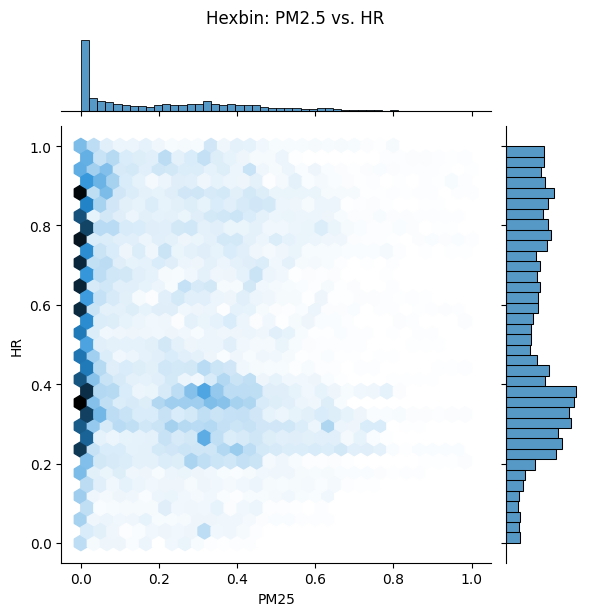

In [71]:
sns.jointplot(x="PM25", y="HR", data=df, kind="hex", gridsize=30)
plt.suptitle("Hexbin: PM2.5 vs. HR", y=1.02)
plt.show()

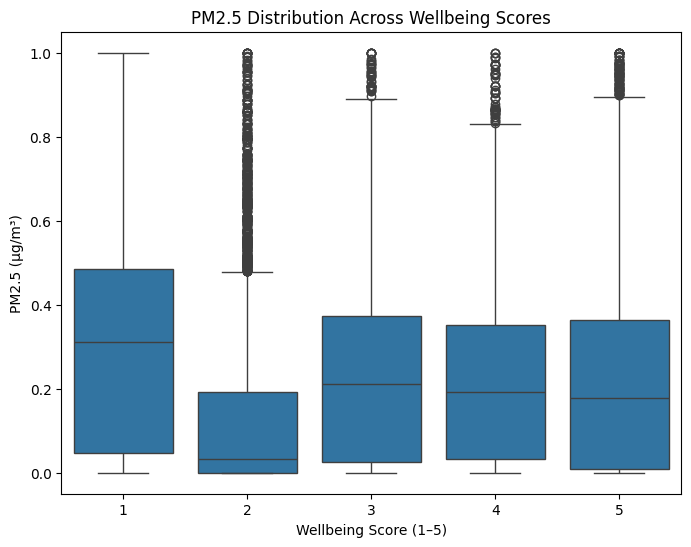

In [72]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="Label", y="PM25", data=df)
plt.title("PM2.5 Distribution Across Wellbeing Scores")
plt.xlabel("Wellbeing Score (1–5)")
plt.ylabel("PM2.5 (µg/m³)")
plt.show()
